<a href="https://colab.research.google.com/github/Dougisnotavailable/Dougisnotavailable/blob/main/Sirius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt

In [9]:
DF_RelatorioPJ = files.upload()
df_pj = pd.read_csv(io.BytesIO(DF_RelatorioPJ['Relatório PJ Sirius.xlsx - Relatório_20_04_2023_15_53_50.csv']))

Saving Relatório PJ Sirius.xlsx - Relatório_20_04_2023_15_53_50.csv to Relatório PJ Sirius.xlsx - Relatório_20_04_2023_15_53_50 (2).csv


In [10]:
DF_ClientesPF = files.upload()
df_pf = pd.read_csv(io.BytesIO(DF_ClientesPF['Clientes PF - CDL.xlsx - Clientes PF.csv']))

Saving Clientes PF - CDL.xlsx - Clientes PF.csv to Clientes PF - CDL.xlsx - Clientes PF (1).csv


In [11]:
df_pj.head()

,DataInicio,DataTermino,Marca,Modelo
0,2/2/21 0:00,2/12/21 0:00,Ford,Ka 1.0 Ticvt Flex 8v 5p
1,2/2/23 0:00,3/2/23 0:00,Ford,Ka 1.0 Ticvt Flex 8v 5p
2,3/2/23 0:00,3/8/23 0:00,Ford,Ka 1.0 Ticvt Flex 8v 5p
3,11/1/21 0:00,12/2/21 0:00,Ford,Ka 1.0 Ticvt Flex 8v 5p
4,10/1/21 0:00,11/1/21 0:00,Chevrolet,Onix Hatch 1.0 8v Flex Power 5p


In [12]:
df_pf.head()

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Unnamed: 7,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro
0,77,2705,12/22/22 0:00,12/23/22 0:00,Sim,QQS9964,Branco,Ford,Ka 1.0 Ticvt Flex 8v 5p,"R$ 89,00","R$ 28,00",1,"R$ 117,00"
1,77,2707,12/28/22 0:00,12/28/22 0:00,Sim,QUB6448,Branco,Fiat,Fiat Strada Working Hard 1.4 Fire Flex 8V,"R$ 133,00","R$ 39,00",1,"R$ 172,00"
2,77,2813,1/13/23 0:00,1/14/23 0:00,Sim,QUB6448,Branco,Fiat,Fiat Strada Working Hard 1.4 Fire Flex 8V,"R$ 250,00","R$ 39,00",1,"R$ 289,00"
3,63,2033,6/17/22 0:00,7/19/22 0:00,Sim,QOV8599,Branco,Ford,Ka + Sedan 1.5 16v Flex 4p,"R$ 2.500,00","R$ 177,00",30,"R$ 2.677,00"
4,47,1596,3/3/22 0:00,4/3/22 0:00,Sim,QUB6267,Branco,Fiat,Fiat Strada Working Hard 1.4 Fire Flex 8V,"R$ 2.000,00","R$ 255,00",30,"R$ 2.255,00"


In [33]:
# Calculando a duração dos contratos
df_pf['Data Inicio do contrato'] = pd.to_datetime(df_pf['Data Inicio do contrato'])
df_pf['Data Término do contrato'] = pd.to_datetime(df_pf['Data Término do contrato'])
df_pf['Duração do Contrato'] = (df_pf['Data Término do contrato'] - df_pf['Data Inicio do contrato']).dt.days

# Calculando a média
media_prazos = df_pf['Duração do Contrato'].mean()

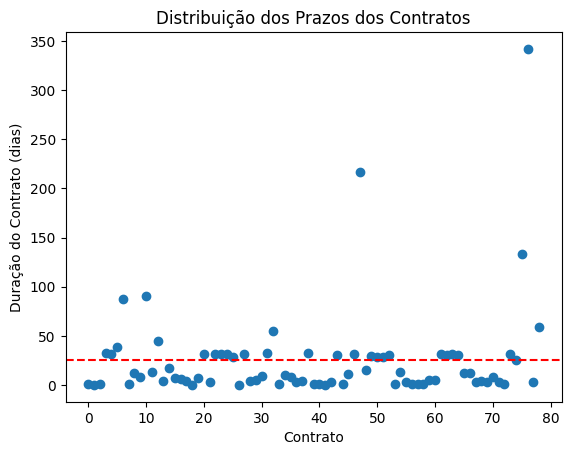

In [23]:
# Criando gráfico de pontos para melhor visualização
plt.scatter(df_pf.index, df_pf['Duração do Contrato'])
plt.xlabel('Contrato')
plt.ylabel('Duração do Contrato (dias)')
plt.title('Distribuição dos Prazos dos Contratos')
plt.axhline(y=media_prazos, color='red', linestyle='--', label='Média')
plt.show()

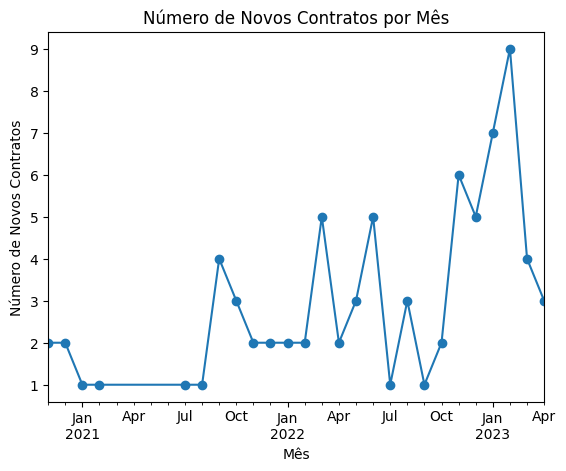

In [46]:
# Descobrir rate de novos contratos por mês
df_pf['Data Inicio do contrato'] = pd.to_datetime(df_pf['Data Inicio do contrato'])

df_pf['Mês de Início'] = df_pf['Data Inicio do contrato'].dt.to_period('M')

novos_contratos_por_mes = df_pf.groupby('Mês de Início').size()

novos_contratos_por_mes.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Número de Novos Contratos')
plt.title('Número de Novos Contratos por Mês')
plt.show()